## That is google colab training Notebook

In [1]:
import os
import pandas as pd
import numpy as np
import random
import json



import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split

2022-12-08 17:33:49.312207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 17:33:54.580251: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 17:33:54.580282: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 17:33:55.065873: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-08 17:34:10.589104: W tensorflow/stream_executor/platform/de

In [2]:
pathf = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
pathd=os.path.join(pathf ,'Datasets')

In [6]:
new_name = pd.read_csv(os.path.join(pathd,'Nname.csv'))
new_name.sample(5)

,Name,Real
30753,رائضض تمحم سارةة,0
4650,فجر عائد شادي,1
17290,فرناس عبدالبصير عبدالرب,1
56305,مزصحم ابرهيم لميسس,0
40563,سفيخنة ضيم معحوف,0


In [4]:
len(new_name['Name'].values)

60000

In [4]:
new_name = new_name.sample(frac=1).reset_index(drop=True)
new_name

,Name,Real
0,أكبر فتحي مبروك,1
1,ناي رنم خمس,0
2,أماني راشد شماخ,1
3,وليفة عريب مزهر,1
4,مزاحم عبدالمطلب ماهر,1
...,...,...
59995,مناصف مبخوت نزار,1
59996,وليد مدلج حنشل,1
59997,لطفة ألضت حسية,0
59998,شاأرة تمم مالكك,0


In [5]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(new_name['Name'].values)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'الدين': 1, 'معين': 2, 'ناصر': 3, 'علاء': 4, 'صلاح': 5, 'نجم': 6, 'بكر': 7, 'ولاء': 8, 'الدينن': 9, 'فتح': 10, 'حسن': 11, 'بشير': 12, 'شمس': 13, 'لدين': 14, 'سعد': 15, 'بشر': 16, 'عقل': 17, 'نصر': 18, 'فرج': 19, 'نضال': 20, 'عمر': 21, 'سهل': 22, 'صمد': 23, 'رضا': 24, 'وهب': 25, 'كنان': 26, 'سلمة': 27, 'سلامة': 28, 'كرم': 29, 'أوس': 30, 'بهجت': 31, 'فهد': 32, 'منير': 33, 'أدهم': 34, 'مزن': 35, 'حزم': 36, 'عبدالجميل': 37, 'تركي': 38, 'فيض': 39, 'را': 40, 'منصف': 41, 'حمد': 42, 'خويلد': 43, 'نسيم': 44, 'براء': 45, 'عزت': 46, 'معتوق': 47, 'غيث': 48, 'منذر': 49, 'فلوح': 50, 'زيد': 51, 'فضل': 52, 'مفتاح': 53, 'عرفة': 54, 'مرزوق': 55, 'وفيق': 56, 'ليث': 57, 'داود': 58, 'مشعل': 59, 'مدرك': 60, 'وهبة': 61, 'عمرو': 62, 'معن': 63, 'أشقر': 64, 'عبدالخالق': 65, 'بشارة': 66, 'مناف': 67, 'أسعد': 68, 'مطر': 69, 'مزهر': 70, 'بارح': 71, 'رافق': 72, 'أنس': 73, 'شيبان': 74, 'عدي': 75, 'ملهم': 76, 'إحسان': 77, 'فرحات': 78, 'جميل': 79, 'أمية': 80, 'ضاوي': 81, 'معد': 82, 'جبران': 83, 

In [6]:
with open('tokenizer.json', 'w') as fp:
    json.dump(tokenizer.word_index, fp)


## Preprocessing the Dataset



In [7]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in new_name['Name'].values :

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)


In [8]:
input_sequences[:10]

[[819, 271, 453],
 [820, 1757, 2211],
 [2212, 327, 272],
 [2930, 511, 70],
 [402, 679, 242],
 [2931, 1093, 2213],
 [22, 328, 273],
 [621, 826, 806],
 [2932, 836, 837],
 [1338, 4503, 2933]]

In [27]:
print(tokenizer.word_index['غفار'])
print(list(tokenizer.word_index.keys())[list(tokenizer.word_index.values()).index(141)]) 

141
غفار


In [10]:
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

5

In [11]:
# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='post'))


In [12]:

xs, ys = input_sequences,new_name['Real'].values


In [13]:
60000 *.05

3000.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.05, 
                                                    random_state=42,stratify=ys)

In [15]:
X_train.shape , X_test.shape

((57000, 5), (3000, 5))

In [16]:
X_train[0]

array([2173,  667,  206,    0,    0], dtype=int32)

## Now let's build the model

In [17]:
model_bi = tf.keras.models.Sequential([    
    tf.keras.layers.Embedding(total_words, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model_bi.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [20]:
history = model_bi.fit(X_train, y_train, epochs=10, batch_size=128,callbacks=[es,mc],
                    validation_data=(X_test, y_test), 
                    validation_steps=10)

Epoch 1/10
446/446 [==============================] - 22s 41ms/step - loss: 0.0478 - accuracy: 0.9762 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 2/10
446/446 [==============================] - 16s 35ms/step - loss: 8.8506e-04 - accuracy: 0.9998 - val_loss: 3.0186e-04 - val_accuracy: 1.0000
Epoch 3/10
446/446 [==============================] - 15s 33ms/step - loss: 1.5859e-04 - accuracy: 0.9999 - val_loss: 0.0011 - val_accuracy: 0.9992
Epoch 4/10
446/446 [==============================] - 15s 34ms/step - loss: 5.0276e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9992
Epoch 5/10
446/446 [==============================] - 15s 34ms/step - loss: 1.7736e-06 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 6/10
446/446 [==============================] - 15s 33ms/step - loss: 1.1157e-06 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 6: early stopping


Train: 1.000, Test: 0.998


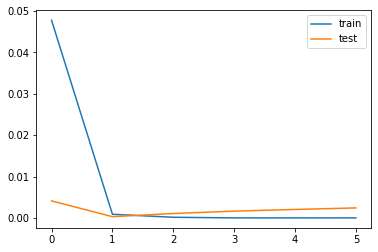

In [21]:
from matplotlib import pyplot

# evaluate the model
_, train_acc = model_bi.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bi.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [22]:
# load a saved model
from tensorflow.keras.models import load_model
saved_model = load_model('best_model.h5')

In [23]:
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.998


## Let's predict some examples

In [24]:
test_name = "محمود ياسر عبدالقادر"

token_list = tokenizer.texts_to_sequences([test_name])[0]

# Pad the sequence
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='post')

# Feed to the model and get the probabilities
probabilities = saved_model.predict(token_list)

if probabilities[0][0] > 0.5:
  print(f'Real name with high confidence equal {probabilities[0][0]:.3f}')
else:
  print(f'Real name with low confidence {probabilities[0][0]:.3f}')
 

1/1 [==============================] - 1s 538ms/step
Real name with high confidence equal 1.000


In [25]:
test_name = "سماح محمد حامد"

token_list = tokenizer.texts_to_sequences([test_name])[0]

# Pad the sequence
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='post')

# Feed to the model and get the probabilities 
probabilities = saved_model.predict(token_list)

if probabilities[0][0] > 0.5:
  print(f'Real name with high confidence equal {probabilities[0][0]:.3f}')
else:
  print(f'Real name with low confidence {probabilities[0][0]:.3f}')

1/1 [==============================] - 0s 21ms/step
Real name with high confidence equal 0.999


In [26]:
test_name = "دحلاب ابو المحاريب"

token_list = tokenizer.texts_to_sequences([test_name])[0]

# Pad the sequence
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='post')

# Feed to the model and get the probabilities 
probabilities = saved_model.predict(token_list)

if probabilities[0][0] > 0.5:
  print(f'Real name with high confidence equal {probabilities[0][0]:.3f}')
else:
  print(f'Real name with low confidence {probabilities[0][0]:.3f}')

1/1 [==============================] - 0s 26ms/step
Real name with low confidence 0.000
